In [8]:
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Activation, concatenate, Conv2DTranspose,MaxPooling2D,Input,Cropping2D,Lambda,Dropout,BatchNormalization
from tensorflow.keras.models import Model

In [9]:
image_path = '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images'
label_path = '/content/drive/MyDrive/Colab Notebooks/ML-FILES/labels'

In [10]:
images = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/*.tif'))
labels = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/ML-FILES/labels/*.tif'))

In [11]:
print(images)
print(labels)

['/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000000.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000001.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000002.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000003.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000004.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000005.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000006.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000007.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000008.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000009.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000010.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000011.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000012.tif', '/content/drive/MyDrive/

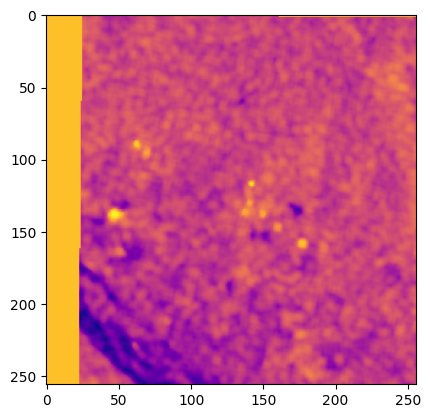

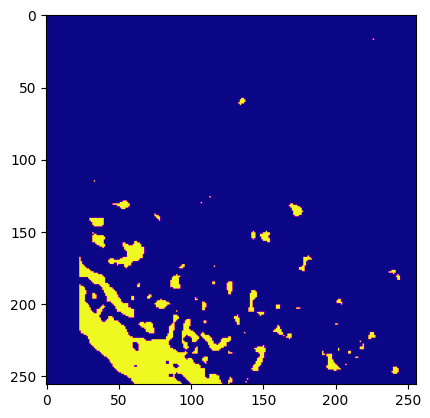

In [12]:
img = Image.open(images[0])
img_1_array = np.array(img)
norm_img_1 = 255 * (img_1_array - img_1_array.min()) / (img_1_array.max() - img_1_array.min())
plt.imshow(norm_img_1,cmap='plasma')
plt.show()
lbl = Image.open(labels[0])
plt.imshow(lbl,cmap='plasma')
plt.show()

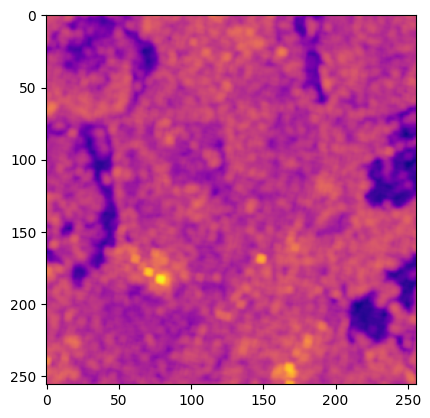

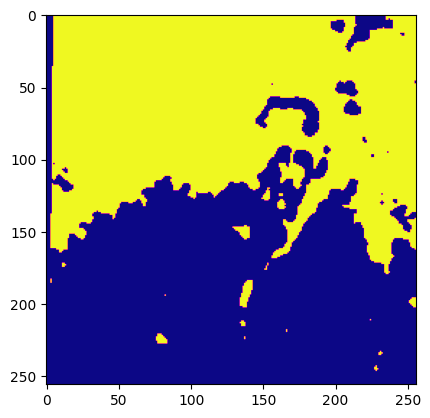

In [13]:
img = Image.open(images[100])
img_1_array = np.array(img)
norm_img_1 = 255 * (img_1_array - img_1_array.min()) / (img_1_array.max() - img_1_array.min())
plt.imshow(norm_img_1,cmap='plasma')
plt.show()
lbl = Image.open(labels[100])
plt.imshow(lbl,cmap='plasma')
plt.show()

In [14]:
#since there is an issue with the images and label data (not matching one another after 100th sample) i am going to split the data before that mismatch section.

num=0
images_new = []
labels_new = []

for img,lbl in zip(images,labels):
  if num<=97:
    images_new.append(img)
    labels_new.append(lbl)
    num+=1

print(images_new)
print(labels_new)

['/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000000.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000001.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000002.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000003.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000004.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000005.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000006.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000007.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000008.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000009.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000010.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000011.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000012.tif', '/content/drive/MyDrive/

In [79]:
X_train, X_test, y_train, y_test = train_test_split(images_new, labels_new, test_size=0.1, random_state=42)

In [80]:
print(X_train)
print(y_train)

['/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000031.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000075.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000047.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000026.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000044.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000004.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000022.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000012.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000090.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000073.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000049.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000070.tif', '/content/drive/MyDrive/Colab Notebooks/ML-FILES/images/000000000068.tif', '/content/drive/MyDrive/

In [81]:
length_train = len(X_train)
length_test = len(X_test)

X_train1 = np.zeros((length_train, 256, 256, 1))
y_train1 = np.zeros((length_train, 256, 256, 1))
X_test1 = np.zeros((length_test, 256, 256, 1))
y_test1 = np.zeros((length_test, 256, 256, 1))

for i,(image,mask) in enumerate(zip(X_train,y_train)):
  img = Image.open(image)
  img_np = np.array(img).reshape(256,256,1)
  norm_img_1 = 255 * (img_np - img_np.min()) / (img_np.max() - img_np.min())
  X_train1[i] = norm_img_1

  mas = Image.open(mask)
  mas_np = np.array(mas).reshape(256,256,1)
  y_train1[i] = mas_np


for i,(image,mask) in enumerate(zip(X_test,y_test)):

  img = Image.open(image)
  img_np = np.array(img).reshape(256,256,1)
  norm_img_1 = 255 * (img_np - img_np.min()) / (img_np.max() - img_np.min())
  X_test1[i] =  norm_img_1

  mas = Image.open(mask)
  mas_np = np.array(mas).reshape(256,256,1)
  y_test1[i] = mas_np

In [82]:
img_width = 256
img_height = 256
bands = 1

# ENCODER
input = Input((img_width, img_height, bands))
scaled_input = Lambda(lambda x: x / 255)(input)

# Encoder block 1
s1 = Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(scaled_input)
s1 = BatchNormalization(axis=3)(s1)
s1 = Activation('relu')(s1)
s1 = Dropout(0.1)(s1)
s1 = Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(s1)
s1 = BatchNormalization(axis=3)(s1)
s1 = Activation('relu')(s1)
p1 = MaxPooling2D(pool_size=(2, 2))(s1)

# Encoder block 2
s2 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(p1)
s2 = BatchNormalization(axis=3)(s2)
s2 = Activation('relu')(s2)
s2 = Dropout(0.1)(s2)
s2 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(s2)
s2 = BatchNormalization(axis=3)(s2)
s2 = Activation('relu')(s2)
p2 = MaxPooling2D(pool_size=(2, 2))(s2)

# Encoder block 3
s3 = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(p2)
s3 = BatchNormalization(axis=3)(s3)
s3 = Activation('relu')(s3)
s3 = Dropout(0.2)(s3)
s3 = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(s3)
s3 = BatchNormalization(axis=3)(s3)
s3 = Activation('relu')(s3)
p3 = MaxPooling2D(pool_size=(2, 2))(s3)

# Encoder block 4
s4 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(p3)
s4 = BatchNormalization(axis=3)(s4)
s4 = Activation('relu')(s4)
s4 = Dropout(0.2)(s4)
s4 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(s4)
s4 = BatchNormalization(axis=3)(s4)
s4 = Activation('relu')(s4)
p4 = MaxPooling2D(pool_size=(2, 2))(s4)

# Base block
s5 = Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(p4)
s5 = BatchNormalization(axis=3)(s5)
s5 = Activation('relu')(s5)
s5 = Dropout(0.3)(s5)
s5 = Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(s5)
s5 = BatchNormalization(axis=3)(s5)
s5 = Activation('relu')(s5)

# DECODER
# Decoder block 1
u1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(s5)
u1 = concatenate([s4, u1])
s6 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(u1)
s6 = BatchNormalization(axis=3)(s6)
s6 = Activation('relu')(s6)
s6 = Dropout(0.2)(s6)
s6 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(s6)
s6 = BatchNormalization(axis=3)(s6)
s6 = Activation('relu')(s6)

# Decoder block 2
u2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(s6)
u2 = concatenate([s3, u2])
s7 = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(u2)
s7 = BatchNormalization(axis=3)(s7)
s7 = Activation('relu')(s7)
s7 = Dropout(0.2)(s7)
s7 = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(s7)
s7 = BatchNormalization(axis=3)(s7)
s7 = Activation('relu')(s7)

# Decoder block 3
u3 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(s7)
u3 = concatenate([s2, u3])
s8 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(u3)
s8 = BatchNormalization(axis=3)(s8)
s8 = Activation('relu')(s8)
s8 = Dropout(0.1)(s8)
s8 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(s8)
s8 = BatchNormalization(axis=3)(s8)
s8 = Activation('relu')(s8)

# Decoder block 4
u4 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(s8)
u4 = concatenate([s1, u4])
s9 = Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(u4)
s9 = BatchNormalization(axis=3)(s9)
s9 = Activation('relu')(s9)
s9 = Dropout(0.1)(s9)
s9 = Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(s9)
s9 = BatchNormalization(axis=3)(s9)
s9 = Activation('relu')(s9)

output = Conv2D(1, (1, 1), activation='sigmoid')(s9)

model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 256, 256, 1)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_38 (Conv2D)        │ (None, 256, 256, 16)   │            160 │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_36    │ (None, 256, 256, 16)   │             64 │ conv2d_38[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_36             │ (None, 256, 256, 16)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 256, 256, 16)   │              0 │ activation_36[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_39 (Conv2D)        │ (None, 256, 256, 16)   │          2,320 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 256, 256, 16)   │             64 │ conv2d_39[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_37             │ (None, 256, 256, 16)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 128, 128, 16)   │              0 │ activation_37[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_38    │ (None, 128, 128, 32)   │            128 │ conv2d_40[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_38             │ (None, 128, 128, 32)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 128, 128, 32)   │              0 │ activation_38[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3

 Total params: 1,946,705 (7.43 MB)

 Trainable params: 1,943,761 (7.41 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [83]:
model.fit(X_train1,y_train1,epochs=10,batch_size=3,validation_data=(X_test1,y_test1))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.8476 - loss: 0.4389 - val_accuracy: 0.6826 - val_loss: 0.7112
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9485 - loss: 0.2511 - val_accuracy: 0.8895 - val_loss: 0.3783
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9487 - loss: 0.2218 - val_accuracy: 0.8904 - val_loss: 0.3320
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9497 - loss: 0.2002 - val_accuracy: 0.8477 - val_loss: 0.4507
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9630 - loss: 0.1725 - val_accuracy: 0.9316 - val_loss: 0.2383
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9583 - loss: 0.1649 - val_accuracy: 0.9431 - val_loss: 0.2042
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9600 - loss: 0.1556 - val_accuracy: 0.9696 - val_loss: 0.2466
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9471 - loss: 0.1629 - val_accuracy: 0.9313 - val_lo

In [84]:
model.save('/content/drive/MyDrive/Colab Notebooks/ML-FILES/MODELS/Flood segmentation model.keras')

<Axes: >

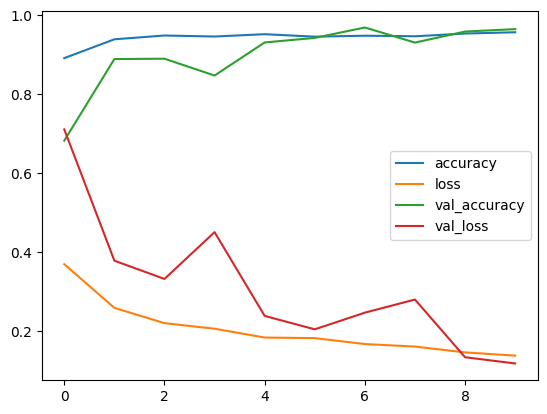

In [86]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

In [87]:
predictions = model.predict(X_test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [88]:
threshold = 0.5
pred_test = (predictions > threshold).astype(np.uint8)
print(np.unique(pred_test))

[0 1]


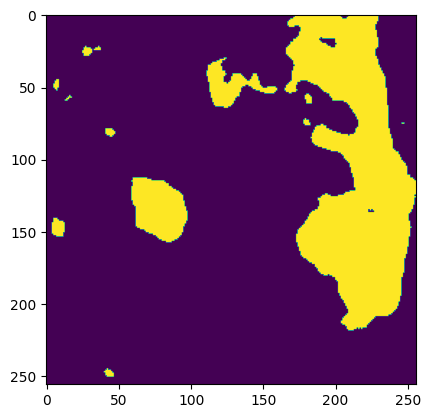

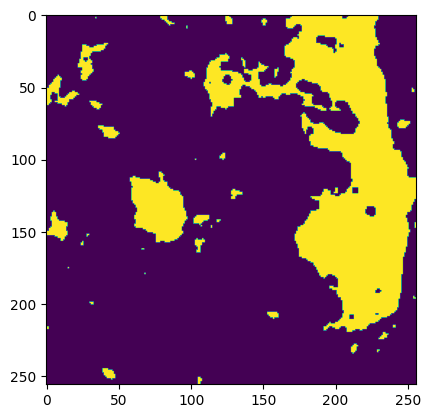

In [89]:
plt.imshow(pred_test[5,:,:,0])
plt.show()
plt.imshow(y_test1[5,:,:,0])
plt.show()

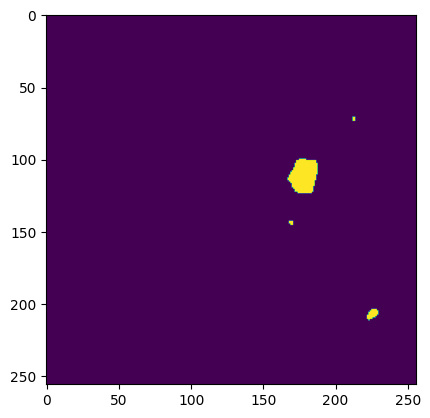

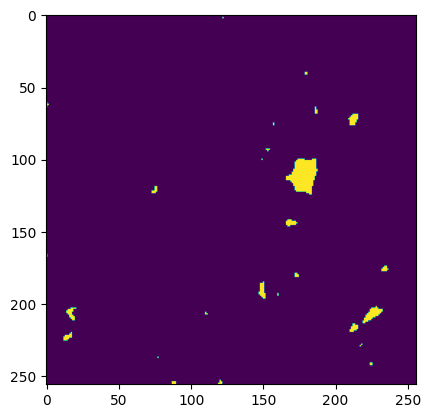

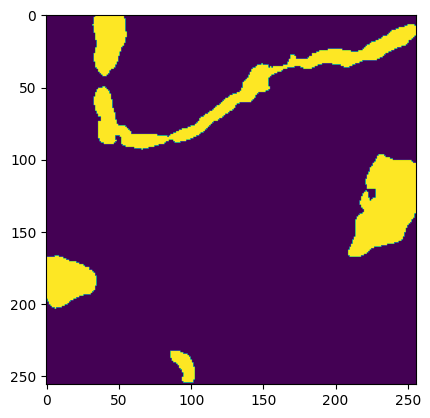

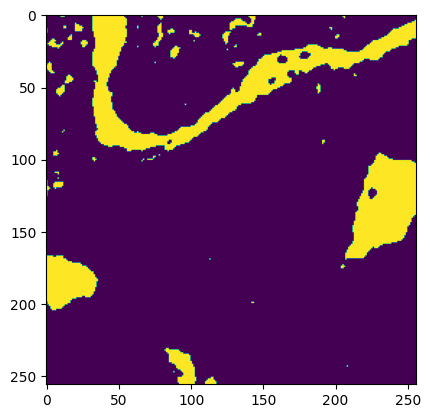

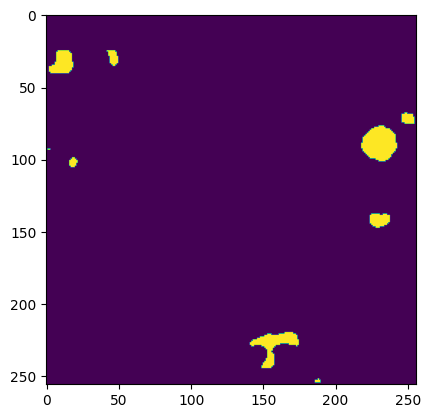

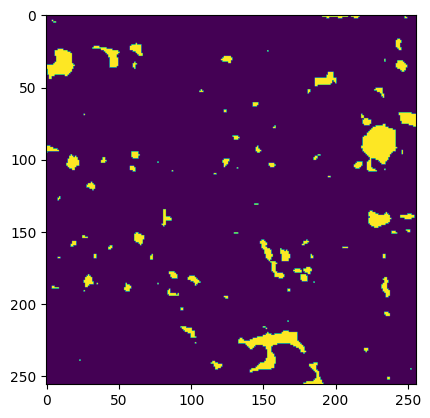

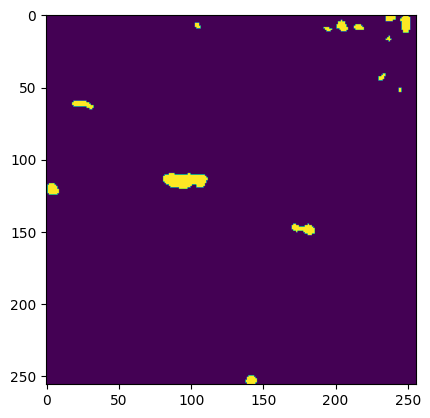

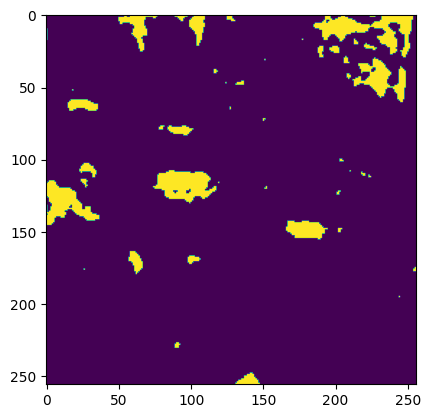

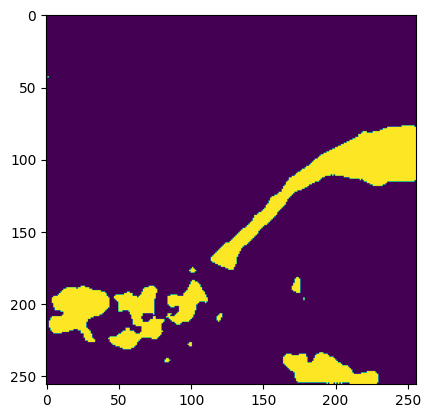

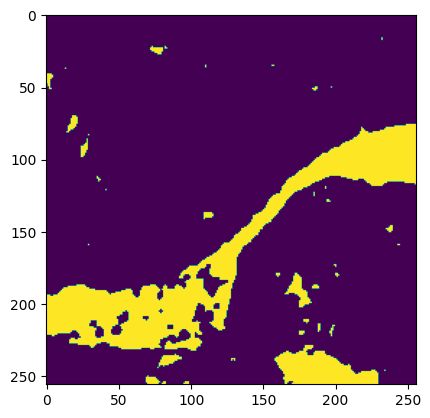

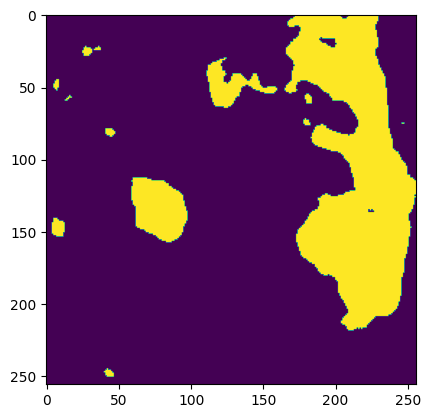

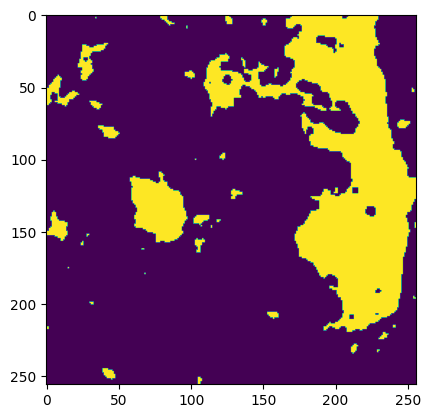

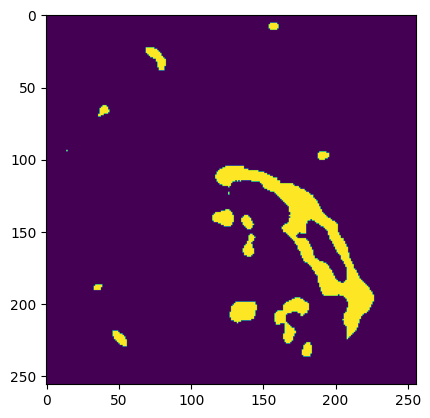

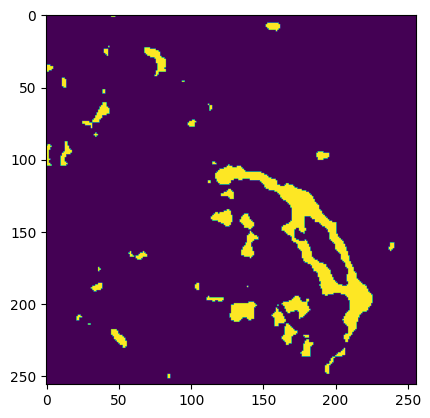

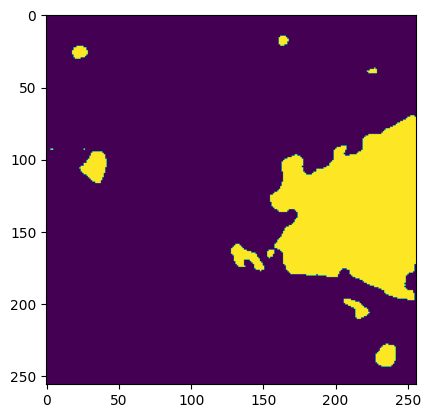

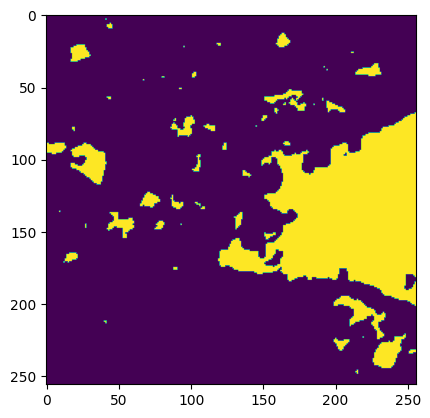

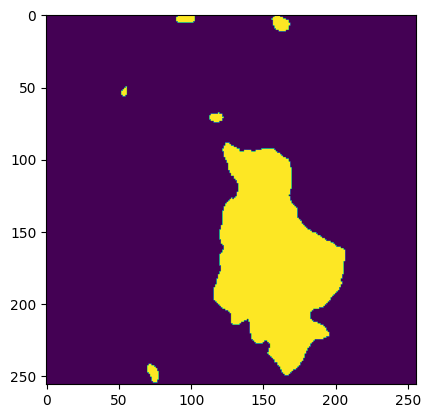

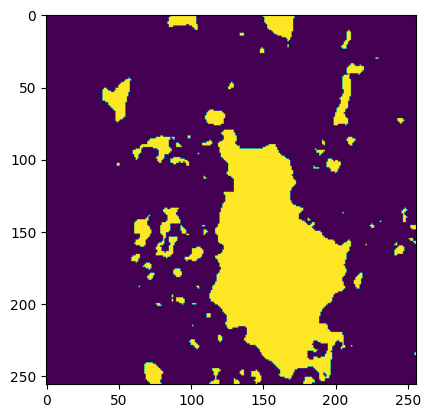

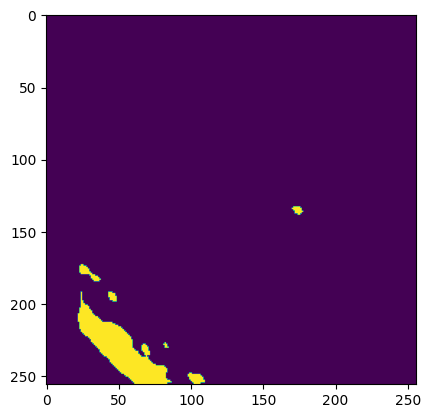

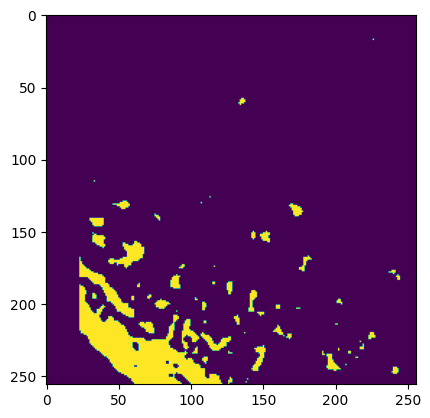

In [90]:
for i in range(len(pred_test)):
  plt.imshow(pred_test[i,:,:,0])
  plt.show()
  plt.imshow(y_test1[i,:,:,0])
  plt.show()